# Preamble

In [1]:
import os
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
import itertools

In [2]:
import parsing
import helper

In [3]:
parsing.TO=600

# Rice

In [101]:
results_full = pd.concat([
    parsing.parse_log_dirs_confidence(
        f"../experiments_final/rice-1-retrained-sigma/VeryDiff-Combined",
        "VeryDiff-Combined",
        parsing.parse_verydiff_confidence),
    parsing.parse_log_dirs_confidence(
        f"../experiments_final/rice-1-retrained-sigma/VeryDiff-Naive",
        "VeryDiff-Naive",
        parsing.parse_verydiff_confidence)
])

In [102]:
results_full_pruned_only = pd.concat([
    parsing.parse_log_dirs_confidence(
        f"../experiments_final/rice-1-sigma/VeryDiff-Combined",
        "VeryDiff-Combined",
        parsing.parse_verydiff_confidence),
    parsing.parse_log_dirs_confidence(
        f"../experiments_final/rice-1-sigma/VeryDiff-Naive",
        "VeryDiff-Naive",
        parsing.parse_verydiff_confidence),
])

In [103]:
results_full

status       time  spurious  difference  \
0     unsafe   0.034245         0   97.370910   
1     unsafe   0.136102         0   97.370910   
2     unsafe   0.040395         0   97.370910   
3     unsafe   0.023712         0   97.370910   
4       safe   0.053838         0  225.667382   
...      ...        ...       ...         ...   
1147  unsafe   0.032965         0  511.450799   
1148    safe   6.465566         0  120.083784   
1149  unsafe  80.830267         0  120.083784   
1150  unsafe   0.847127         0  120.083784   
1151  unsafe   0.373483         0  120.083784   

                                   init_bounds_0  \
0       [-11.19472777738214, -9.684489699917751]   
1     [-20.921592825660298, -18.928792556526066]   
2      [-40.26087295293402, -37.157463132804736]   
3       [-59.58425371458331, -55.33146882256219]   
4      [-12.062279645174534, -9.975934569510112]   
...                                          ...   
1147         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1148         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1149         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1150         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1151         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                 init_bounds_1  splits  instable_generators  \
0      [9.383334484991535, 11.464955720171318]       6                   64   
1     [18.307699876353205, 21.440664276972587]      25                   64   
2       [35.91337341602066, 41.26741889150132]       9                   64   
3       [53.46637470311998, 61.06926558880116]       5                   64   
4     [10.267114375189326, 11.798841331842702]       9                   16   
...                                        ...     ...                  ...   
1147       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]      11                    0   
1148       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]    1553                    0   
1149       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   32282                    0   
1150       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]     326                    0   
1151       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]     127                    0   

     network  sigma     delta          spec     mirror             solver  \
0       2_40    0.5  0.500000       0.5-0.5  prune-0.2  VeryDiff-Combined   
1       2_40    1.0  0.500000       1.0-0.5  prune-0.2  VeryDiff-Combined   
2       2_40    2.0  0.500000       2.0-0.5  prune-0.2  VeryDiff-Combined   
3       2_40    3.0  0.500000       3.0-0.5  prune-0.2  VeryDiff-Combined   
4       2_40    0.5  0.999999  0.5-0.999999  prune-0.8  VeryDiff-Combined   
...      ...    ...       ...           ...        ...                ...   
1147    2_80    3.0  0.990000      3.0-0.99  prune-0.8     VeryDiff-Naive   
1148    2_40    0.5  0.999000     0.5-0.999  prune-0.3     VeryDiff-Naive   
1149    2_40    1.0  0.999000     1.0-0.999  prune-0.3     VeryDiff-Naive   
1150    2_40    2.0  0.999000     2.0-0.999  prune-0.3     VeryDiff-Naive   
1151    2_40    3.0  0.999000     3.0-0.999  prune-0.3     VeryDiff-Naive   

         property  
0     delta-top-1  
1     delta-top-1  
2     delta-top-1  
3     delta-top-1  
4     delta-top-1  
...           ...  
1147  delta-top-1  
1148  delta-top-1  
1149  delta-top-1  
1150  delta-top-1  
1151  delta-top-1  

[2304 rows x 15 columns]

In [104]:
#results_full = results_full[results_full["network"] != "4_40"]

## Results for Certification

In [105]:
results_full = helper.compute_speedup_confidence(results_full, "VeryDiff-Combined", "VeryDiff-Naive")
results_full_pruned_only = helper.compute_speedup_confidence(results_full_pruned_only, "VeryDiff-Combined", "VeryDiff-Naive")

Baseline:  1125
Variant:  1141
Merged:  1124
Baseline:  560
Variant:  605
Merged:  557


In [106]:
results_safe = results_full[results_full["status"] == "safe"]
results_safe_rice = results_safe.copy()
results_full_pruned_only_safe = results_full_pruned_only[results_full_pruned_only["status"] == "safe"].copy()

In [107]:
table_1_1 = results_safe.copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1 = table_1_1.groupby(["solver"]).agg({"solved": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"]})
table_1_1

solved   speedup                                          
                     sum       min       q25    median       q75         max
solver                                                                      
VeryDiff-Combined    347       NaN       NaN       NaN       NaN         NaN
VeryDiff-Naive       339  0.439059  0.820276  1.082365  2.150078  165.948154

In [108]:
table_1_1 = results_full_pruned_only_safe.copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1 = table_1_1.groupby(["solver"]).agg({"solved": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"]})
table_1_1

solved   speedup                                   \
                     sum       min       q25     median         q75   
solver                                                                
VeryDiff-Combined    236       NaN       NaN        NaN         NaN   
VeryDiff-Naive       200  0.657182  2.725924  11.551613  184.732238   

                                 
                            max  
solver                           
VeryDiff-Combined           NaN  
VeryDiff-Naive     54463.207652

In [11]:
print(" Pruned & Retrained")
print("# Benchmark Queries for VeryDiff-Combined: ", len(results_full[results_full["solver"] == "VeryDiff-Combined"]))
print("# Counterexamples for VeryDiff-Combined: ", len(results_full[(results_full["status"] == "unsafe") & (results_full["solver"] == "VeryDiff-Combined")]))

print("# Benchmark Queries for VeryDiff-Naive: ", len(results_full[results_full["solver"] == "VeryDiff-Naive"]))
print("# Counterexamples for VeryDiff-Naive: ", len(results_full[(results_full["status"] == "unsafe") & (results_full["solver"] == "VeryDiff-Naive")]))

print(" Pruned Only")
print("# Benchmark Queries for VeryDiff-Combined: ", len(results_full_pruned_only[results_full_pruned_only["solver"] == "VeryDiff-Combined"]))
print("# Counterexamples for VeryDiff-Combined: ", len(results_full_pruned_only[(results_full_pruned_only["status"] == "unsafe") & (results_full_pruned_only["solver"] == "VeryDiff-Combined")]))
print("# Benchmark Queries for VeryDiff-Naive: ", len(results_full_pruned_only[results_full_pruned_only["solver"] == "VeryDiff-Naive"]))
print("# Counterexamples for VeryDiff-Naive: ", len(results_full_pruned_only[(results_full_pruned_only["status"] == "unsafe") & (results_full_pruned_only["solver"] == "VeryDiff-Naive")]))

 Pruned & Retrained
# Benchmark Queries for VeryDiff-Combined:  1152
# Counterexamples for VeryDiff-Combined:  794
# Benchmark Queries for VeryDiff-Naive:  1152
# Counterexamples for VeryDiff-Naive:  786
 Pruned Only
# Benchmark Queries for VeryDiff-Combined:  640
# Counterexamples for VeryDiff-Combined:  369
# Benchmark Queries for VeryDiff-Naive:  640
# Counterexamples for VeryDiff-Naive:  360


In [12]:
print(" Pruned & Retrained")
# Compute commonly / distinctly solved queries
results_combined = results_full[results_full["solver"] == "VeryDiff-Combined"].copy()
results_naive = results_full[results_full["solver"] == "VeryDiff-Naive"].copy()
results_joined = results_combined.merge(results_naive, on=["network","sigma","delta","mirror"])

print("# Commonly solved queries: ", len(results_joined[(results_joined["status_x"] == "safe") & (results_joined["status_y"] == "safe")]))
print("# Only solved by VeryDiff-Combined: ", len(results_joined[(results_joined["status_x"] == "safe") & (results_joined["status_y"] == "unknown")]))
print("# Only solved by VeryDiff-Naive: ", len(results_joined[(results_joined["status_x"] == "unknown") & (results_joined["status_y"] == "safe")]))
print("# Not solved by any: ", len(results_joined[(results_joined["status_x"] == "unknown") & (results_joined["status_y"] == "unknown")]))

print(" Pruned Only")
# Compute commonly / distinctly solved queries
results_combined_pruned_only = results_full_pruned_only[results_full_pruned_only["solver"] == "VeryDiff-Combined"].copy()
results_naive_pruned_only = results_full_pruned_only[results_full_pruned_only["solver"] == "VeryDiff-Naive"].copy()
results_joined_pruned_only = results_combined_pruned_only.merge(results_naive_pruned_only, on=["network","sigma","delta","mirror"])

print("# Commonly solved queries: ", len(results_joined_pruned_only[(results_joined_pruned_only["status_x"] == "safe") & (results_joined_pruned_only["status_y"] == "safe")]))
print("# Only solved by VeryDiff-Combined: ", len(results_joined_pruned_only[(results_joined_pruned_only["status_x"] == "safe") & (results_joined_pruned_only["status_y"] == "unknown")]))
print("# Only solved by VeryDiff-Naive: ", len(results_joined_pruned_only[(results_joined_pruned_only["status_x"] == "unknown") & (results_joined_pruned_only["status_y"] == "safe")]))
print("# Not solved by any: ", len(results_joined_pruned_only[(results_joined_pruned_only["status_x"] == "unknown") & (results_joined_pruned_only["status_y"] == "unknown")]))

 Pruned & Retrained
# Commonly solved queries:  339
# Only solved by VeryDiff-Combined:  8
# Only solved by VeryDiff-Naive:  0
# Not solved by any:  10
 Pruned Only
# Commonly solved queries:  199
# Only solved by VeryDiff-Combined:  37
# Only solved by VeryDiff-Naive:  1
# Not solved by any:  32


In [13]:
table = results_full.copy()
table["equiv"] = table["status"]=="safe"
table["counterex"] = table["status"]=="unsafe"
table["TO"] = table["status"]=="unknown"
table = table.groupby(["network","solver"]).agg({"equiv": "sum", "counterex":"sum", "TO": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"]})
table

equiv counterex  TO   speedup                      \
                            sum       sum sum       min       q25    median   
network solver                                                                
2_20    VeryDiff-Combined   153       131   4       NaN       NaN       NaN   
        VeryDiff-Naive      148       126  14  0.048441  0.810530  0.938150   
2_40    VeryDiff-Combined    88       200   0       NaN       NaN       NaN   
        VeryDiff-Naive       87       197   4  0.270231  0.713898  0.800675   
2_80    VeryDiff-Combined    81       205   2       NaN       NaN       NaN   
        VeryDiff-Naive       79       204   5  0.219236  0.619402  0.722714   
4_40    VeryDiff-Combined    25       258   5       NaN       NaN       NaN   
        VeryDiff-Naive       25       259   4  0.087611  0.630800  0.680394   

                                                  
                                q75          max  
network solver                                    
2_20    VeryDiff-Combined       NaN          NaN  
        VeryDiff-Naive     2.157202   359.153074  
2_40    VeryDiff-Combined       NaN          NaN  
        VeryDiff-Naive     1.131764  5125.886378  
2_80    VeryDiff-Combined       NaN          NaN  
        VeryDiff-Naive     0.953501  1491.690443  
4_40    VeryDiff-Combined       NaN          NaN  
        VeryDiff-Naive     0.754882     7.651496

In [14]:
table_1_1 = results_safe.copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1["TO"] = table_1_1["status"]=="unknown"
table_1_1 = table_1_1.groupby(["delta","solver"]).agg({"solved": "sum", "TO": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"], "splits": ["min",helper.q25,"median",helper.q75,"max"]})
table_1_1

solved  TO   speedup                                \
                              sum sum       min       q25    median       q75   
delta    solver                                                                 
0.900000 VeryDiff-Combined      5   0       NaN       NaN       NaN       NaN   
         VeryDiff-Naive         5   0  1.257054  1.754776  2.027118  4.264170   
0.990000 VeryDiff-Combined     19   0       NaN       NaN       NaN       NaN   
         VeryDiff-Naive        19   0  0.866315  1.020433  1.636442  3.059871   
0.999000 VeryDiff-Combined     41   0       NaN       NaN       NaN       NaN   
         VeryDiff-Naive        37   0  0.665837  0.844358  1.056056  2.189734   
0.999900 VeryDiff-Combined     54   0       NaN       NaN       NaN       NaN   
         VeryDiff-Naive        53   0  0.643245  0.847053  1.143129  2.036863   
0.999990 VeryDiff-Combined     67   0       NaN       NaN       NaN       NaN   
         VeryDiff-Naive        65   0  0.647897  0.808053  1.156970  2.346586   
0.999999 VeryDiff-Combined     78   0       NaN       NaN       NaN       NaN   
         VeryDiff-Naive        78   0  0.474898  0.759265  0.986178  1.838830   
1.000000 VeryDiff-Combined     83   0       NaN       NaN       NaN       NaN   
         VeryDiff-Naive        82   0  0.439059  0.782644  0.967922  1.738961   

                                       splits                               \
                                   max    min       q25   median       q75   
delta    solver                                                              
0.900000 VeryDiff-Combined         NaN   1262   3150.00   7108.0   8164.00   
         VeryDiff-Naive      11.327762  19169  19489.00  19966.0  20335.00   
0.990000 VeryDiff-Combined         NaN     15    363.50   1703.0   7334.00   
         VeryDiff-Naive      33.093652    323    722.00   7579.0  28574.00   
0.999000 VeryDiff-Combined         NaN      0    173.00   1111.0   2849.00   
         VeryDiff-Naive      68.293127     40    501.00   1643.0   5811.00   
0.999900 VeryDiff-Combined         NaN      0    103.50    396.0   9065.25   
         VeryDiff-Naive      97.841289     12    202.00   1215.0  16808.00   
0.999990 VeryDiff-Combined         NaN      0     38.50    375.0   4833.00   
         VeryDiff-Naive     130.819383      4     97.00    595.0   9236.00   
0.999999 VeryDiff-Combined         NaN      0     17.25    334.5   2305.50   
         VeryDiff-Naive     165.948154      1     50.00    589.5   5525.00   
1.000000 VeryDiff-Combined         NaN      0     10.50    203.0   1585.50   
         VeryDiff-Naive      87.431250      0     27.00    205.0   3825.00   

                                    
                               max  
delta    solver                     
0.900000 VeryDiff-Combined   12538  
         VeryDiff-Naive      20886  
0.990000 VeryDiff-Combined   47625  
         VeryDiff-Naive      63323  
0.999000 VeryDiff-Combined  116792  
         VeryDiff-Naive      75700  
0.999900 VeryDiff-Combined   37100  
         VeryDiff-Naive      79461  
0.999990 VeryDiff-Combined   85749  
         VeryDiff-Naive     148300  
0.999999 VeryDiff-Combined   47712  
         VeryDiff-Naive      91389  
1.000000 VeryDiff-Combined   57053  
         VeryDiff-Naive      68143

In [15]:
table_1_1 = results_safe.copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1["TO"] = table_1_1["status"]=="unknown"
table_1_1 = table_1_1.groupby(["mirror","solver"]).agg({"solved": "sum", "TO": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"], "splits": ["min",helper.q25,"median",helper.q75,"max"]})
table_1_1

solved  TO   speedup                      \
                               sum sum       min       q25    median   
mirror    solver                                                       
prune-0.1 VeryDiff-Combined     50   0       NaN       NaN       NaN   
          VeryDiff-Naive        45   0  0.611895  3.193101  5.000182   
prune-0.2 VeryDiff-Combined     40   0       NaN       NaN       NaN   
          VeryDiff-Naive        39   0  0.623938  1.447747  3.051011   
prune-0.3 VeryDiff-Combined     41   0       NaN       NaN       NaN   
          VeryDiff-Naive        39   0  0.631789  1.201463  1.856369   
prune-0.4 VeryDiff-Combined     41   0       NaN       NaN       NaN   
          VeryDiff-Naive        41   0  0.643880  1.219283  1.562154   
prune-0.5 VeryDiff-Combined     44   0       NaN       NaN       NaN   
          VeryDiff-Naive        44   0  0.627127  0.939649  1.033432   
prune-0.6 VeryDiff-Combined     37   0       NaN       NaN       NaN   
          VeryDiff-Naive        37   0  0.474898  0.808053  0.919721   
prune-0.7 VeryDiff-Combined     33   0       NaN       NaN       NaN   
          VeryDiff-Naive        33   0  0.662833  0.717255  0.776358   
prune-0.8 VeryDiff-Combined     33   0       NaN       NaN       NaN   
          VeryDiff-Naive        33   0  0.636172  0.734083  0.781503   
prune-0.9 VeryDiff-Combined     28   0       NaN       NaN       NaN   
          VeryDiff-Naive        28   0  0.439059  0.750238  0.807681   

                                                   splits                  \
                                   q75         max    min     q25  median   
mirror    solver                                                            
prune-0.1 VeryDiff-Combined        NaN         NaN      0   11.25   345.0   
          VeryDiff-Naive     25.870667  165.948154      1  205.00  2124.0   
prune-0.2 VeryDiff-Combined        NaN         NaN      0   29.00   531.5   
          VeryDiff-Naive      5.051715   17.386694      1  186.00  1426.0   
prune-0.3 VeryDiff-Combined        NaN         NaN      0   39.00   668.0   
          VeryDiff-Naive      2.233940    4.616189      1  152.00  1243.0   
prune-0.4 VeryDiff-Combined        NaN         NaN      0   44.00   637.0   
          VeryDiff-Naive      1.812219    3.049381      1  105.00  1171.0   
prune-0.5 VeryDiff-Combined        NaN         NaN      0   98.25  1130.5   
          VeryDiff-Naive      1.220941    1.613039      1  178.25  1727.5   
prune-0.6 VeryDiff-Combined        NaN         NaN      0   57.00   460.0   
          VeryDiff-Naive      0.959368    1.078769      1   73.00   590.0   
prune-0.7 VeryDiff-Combined        NaN         NaN      2   47.00   411.0   
          VeryDiff-Naive      0.830724    1.013654      2   50.00   486.0   
prune-0.8 VeryDiff-Combined        NaN         NaN      1   36.00   291.0   
          VeryDiff-Naive      0.826230    1.166561      1   40.00   309.0   
prune-0.9 VeryDiff-Combined        NaN         NaN      0   22.75   155.0   
          VeryDiff-Naive      0.839315    0.913223      0   22.75   155.5   

                                               
                                  q75     max  
mirror    solver                               
prune-0.1 VeryDiff-Combined   2373.50   85749  
          VeryDiff-Naive     16808.00  130674  
prune-0.2 VeryDiff-Combined   3384.75   52698  
          VeryDiff-Naive     11136.00  148300  
prune-0.3 VeryDiff-Combined   6731.00  116792  
          VeryDiff-Naive      9637.00   70980  
prune-0.4 VeryDiff-Combined   4067.00   43560  
          VeryDiff-Naive      9469.00   91389  
prune-0.5 VeryDiff-Combined   9288.50   75669  
          VeryDiff-Naive     12329.75   75700  
prune-0.6 VeryDiff-Combined   3649.00   47163  
          VeryDiff-Naive      4476.00   55945  
prune-0.7 VeryDiff-Combined   2849.00   54544  
          VeryDiff-Naive      3160.00   56860  
prune-0.8 VeryDiff-Combined   1488.00   33010  
          VeryDiff-Naive      149

In [16]:
achieved_certification = results_safe.copy()
achieved_certification.reset_index(inplace=True,drop=True)
achieved_certification1 = achieved_certification.groupby(["network","mirror","sigma","solver"])["delta"].agg(["min","idxmin"])
achieved_certification1["time"] = achieved_certification.loc[achieved_certification1["idxmin"]]["time"].values
# drop idxmin
achieved_certification1.drop(columns=["idxmin"],inplace=True)
index0 = achieved_certification1.index.get_level_values(0).unique()
index1 = achieved_certification1.index.get_level_values(1).unique()
index2 = achieved_certification1.index.get_level_values(2).unique()
for (i0,i1,i2) in itertools.product(index0,index1,index2):
    if (i0,i1,i2) in achieved_certification1.index:
        matching_runs = achieved_certification1.loc[i0,i1,i2]
        min_delta = matching_runs["min"].min()
        matching_runs.loc[matching_runs["min"]>min_delta,"time"] = np.nan
        matching_runs.loc[matching_runs["min"]>min_delta,"min"] = np.nan

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(achieved_certification1)

                                                min        time
network mirror    sigma solver                                 
2_20    prune-0.1 0.5   VeryDiff-Combined  0.900000    6.361833
                        VeryDiff-Naive     0.900000   72.065322
                  1.0   VeryDiff-Combined  0.990000    9.074296
                        VeryDiff-Naive     0.990000  153.786949
                  2.0   VeryDiff-Combined  0.999000   62.771783
                        VeryDiff-Naive          NaN         NaN
                  3.0   VeryDiff-Combined  0.999900  142.264411
                        VeryDiff-Naive          NaN         NaN
        prune-0.2 0.5   VeryDiff-Combined  0.900000   15.947457
                        VeryDiff-Naive     0.900000   68.002675
                  1.0   VeryDiff-Combined  0.990000   38.496095
                        VeryDiff-Naive     0.990000  155.838670
                  2.0   VeryDiff-Combined  0.999000  266.331514
                        VeryDiff-Naive  

## Plot

In [18]:
font = {'size'   : 16}

plt.rc('font', **font)

### Speedup by Difference

In [19]:
parameters = {
    "2_20" : (7*20 + 20*20 + 20*2),
    "2_40" : (7*40 + 40*40 + 40*2),
    "2_80" : (7*80 + 80*80 + 80*2),
    "4_40" : (7*40 + 40*40*3 + 40*2)
}

In [20]:
table = results_safe.copy()
#table_1_1 = table_1_1[(table_1_1["mirror"]=="prune-0.1") | (table_1_1["mirror"]=="prune-0.2") | (table_1_1["mirror"]=="prune-0.3") | (table_1_1["mirror"]=="prune-0.4") | (table_1_1["mirror"]=="prune-0.5")]
#table["difference"] = table.apply(lambda x: x["difference"] / parameters[x["network"]], axis=1)
table = table.groupby(["difference","solver"]).agg({"speedup": [helper.q25,"median",helper.q75], "split_reduction": [helper.q25,"median",helper.q75]})
delta_plots = table[[x[1]=="VeryDiff-Naive" for x in table.index]].copy()

table = results_full_pruned_only_safe.copy()
#table["difference"] = table.apply(lambda x: x["difference"] / parameters[x["network"]], axis=1)
table = table.groupby(["difference","solver"]).agg({"speedup": [helper.q25,"median",helper.q75], "split_reduction": [helper.q25,"median",helper.q75]})
delta_plots_pruned_only = table[[x[1]=="VeryDiff-Naive" for x in table.index]].copy()

In [21]:
differences1 = delta_plots.index.get_level_values(0)
print(differences1)
differences2 = delta_plots_pruned_only.index.get_level_values(0)
print(differences2)

Float64Index([ 22.47694844093874,  35.82302228386444,  48.11874633010462,
               58.56838810841992,  66.73631667773117,  68.83219305775845,
               77.98234105455528,  86.67521825644259,  94.93665430674397,
               97.37090967600152, 101.12176493990366, 120.08378381788802,
              141.42164600413622,  161.4484885802308,  176.1269068096946,
              186.45896522644503,  207.2795459308174, 225.66738212758284,
               233.1892142532401, 234.87432402211363,  238.2109224389196,
               258.0794179099261, 288.96871826810354,  301.6284660100324,
               331.4802491610033, 345.64178124005446, 368.04790328333604,
              395.67448107236686,   400.705535579562, 434.62166762598747,
               435.3025413528137,  454.4537581263213, 470.31319837027127,
               475.5876987416571, 511.45079948192586,  535.2065856012854],
             dtype='float64', name='difference')
Float64Index([ 5.842207782992718,  9.973839749940705, 16.08526

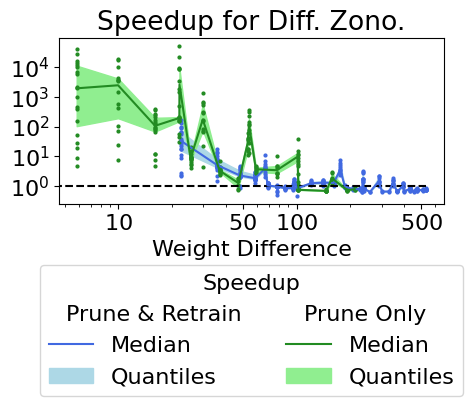

In [22]:
# Two plots with speedup and split reduction
fig, ax = plt.subplots(1,1, figsize=(5,5))

xs1 = np.array(differences1)#np.arange(len(deltas))
xs2 = np.array(differences2)#np.arange(len(deltas))
ax.plot([0,max(np.max(xs1),np.max(xs2))],[1,1],color="black",linestyle="--")
# ax.plot([0,max(np.max(xs1),np.max(xs2))],[2,2],color="black",linestyle="--")
# ax.plot([0,max(np.max(xs1),np.max(xs2))],[100,100],color="black",linestyle="--")
# ax.plot([0,max(np.max(xs1),np.max(xs2))],[10000,10000],color="black",linestyle="--")

#xs = np.max(xs) - xs
ax.fill_between(xs1, delta_plots["speedup"]["q25"], delta_plots["speedup"]["q75"], color="lightblue", label="Quantiles (Pruned & Retrained")
ax.plot(xs1, delta_plots["speedup"]["median"], label="Speedup (Pruned & Retrained)", color="royalblue")

ax.fill_between(xs2, delta_plots_pruned_only["speedup"]["q25"], delta_plots_pruned_only["speedup"]["q75"], color="lightgreen", label="Quantiles (Pruned Only)")
ax.plot(xs2, delta_plots_pruned_only["speedup"]["median"], label="Speedup (Pruned Only)", color="forestgreen")

results_safe.plot(x="difference",y="speedup",kind="scatter",logy=True,ax=ax,color="royalblue", s=4)
results_full_pruned_only_safe.plot(x="difference",y="speedup",kind="scatter",logy=True,ax=ax,color="forestgreen", s=4)


ax.set_title("Speedup for Diff. Zono.")
ax.set_yscale("log")

ax.set_yticks([1,10,100,1000,10000])

#[0.99,0.999,0.9999,0.99999,0.999999,0.9999999]

ax.set_xlabel("Weight Difference")
ax.set_ylabel(None)
ax.set_xscale("log")

ax.set_xticks([10,50,100,500])
ax.set_xticklabels(["$10$","$50$","$100$","$500$"])

# Print legend below plot
handles, labels = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]*2
handles = [ph[0], handles[1], handles[0], ph[1], handles[3], handles[2]]
labels = ["Prune & Retrain", "Median", "Quantiles", "Prune Only", "Median", "Quantiles"]

leg = ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2,title="Speedup")
for vpack in leg._legend_handle_box.get_children():
    for hpack in vpack.get_children()[:1]:
        hpack.get_children()[0].set_width(0)

# ax[1].fill_between(xs, split_reduction_q25, split_reduction_q75, alpha=0.5)
# ax[1].plot(xs, split_reduction_median, label="Split reduction")
# ax[1].set_xlabel("Confidence Gap $(1-\delta)$")
# ax[1].set_ylabel("Split reduction")
# ax[1].set_xticks([0,3,5])
# ax[1].set_xticklabels(delta_text)
# ax[1].set_title("Split reduction")

plt.tight_layout()
plt.show()

In [23]:
fig.savefig("rice_difference_speedup.eps",bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [24]:
results_full_pruned_only_safe.groupby(["network","mirror"]).agg({"difference":"max", "speedup": ["min",helper.q25,"median",helper.q75,"max"]})

difference    speedup                           \
                          max        min         q25       median   
network mirror                                                      
2_20    prune-0.1    5.842208   4.567202  103.661923  1966.994954   
        prune-0.2   16.085267   4.775251   68.384355   106.781255   
        prune-0.3   25.436288   4.054405    6.823436     8.500003   
        prune-0.4   37.000527   2.252208    2.954035     3.264082   
        prune-0.5   47.138405   0.723678    0.851398     1.242192   
2_40    prune-0.1    9.973840   7.733191  192.167507  2490.566649   
        prune-0.2   29.790603   4.310760   72.700634   173.478199   
        prune-0.3   53.137523  11.176317   16.532358    26.968543   
        prune-0.4   77.493646   2.067627    2.690610     3.376256   
        prune-0.5  102.233627   0.882709    0.941780     1.106990   
2_80    prune-0.1   22.036063  29.594079  406.653660  2612.488697   
        prune-0.2   54.086107  12.734268   51.845615   115.944996   
        prune-0.3  101.278886   4.578084    6.758826     9.624578   
        prune-0.4  157.828924   1.262640    1.484304     1.804000   
        prune-0.5  211.812265   0.704449    0.738345     0.771263   
4_40    prune-0.1   22.003988  55.379563  151.788710   195.986278   
        prune-0.2   59.150966   2.633389    2.980064     3.645018   
        prune-0.3  102.430021   0.725951    0.730254     0.736011   
        prune-0.4  146.701271   0.657182    0.670735     0.678781   
        prune-0.5  192.555257   0.677615    0.695118     0.714696   

                                               
                            q75           max  
network mirror                                 
2_20    prune-0.1  11440.149122  42814.782222  
        prune-0.2    198.774621    397.658283  
        prune-0.3      9.481533     20.424877  
        prune-0.4      3.586492      6.826062  
        prune-0.5      1.598734      1.907310  
2_40    prune-0.1   4198.077447  19785.343926  
        prune-0.2    555.609894   1373.928123  
        prune-0.3     38.161710     61.573990  
        prune-0.4      4.660399      9.961055  
        prune-0.5      1.263945      2.503378  
2_80    prune-0.1   9112.543672  54463.207652  
        prune-0.2    183.834874    369.089527  
        prune-0.3     12.912174     37.786307  
        prune-0.4      2.583959      3.044815  
        prune-0.5      0.798439      0.882999  
4_40    prune-0.1    208.511768    216.998162  
        prune-0.2      4.134961      4.712595  
        prune-0.3      0.794041      0.805849  
        prune-0.4      0.697353      0.768164  
        prune-0.5      0.716357      0.750315

# LHC

In [91]:
results_full = pd.concat([
    parsing.parse_log_dirs_confidence(
        f"../experiments_final/lhc-sigma/VeryDiff-Combined",
        "VeryDiff-Combined",
        parsing.parse_verydiff_confidence),
    parsing.parse_log_dirs_confidence(
        f"../experiments_final/lhc-sigma/VeryDiff-Naive",
        "VeryDiff-Naive",
        parsing.parse_verydiff_confidence),
    pd.read_pickle("../benchmarks_abcrown/lhc-prune_results.pkl")
])

In [92]:
results_full = helper.compute_speedup_confidence(results_full, "VeryDiff-Combined", "VeryDiff-Naive")
results_full = helper.compute_speedup_confidence(results_full, "VeryDiff-Combined", "abCROWN")

Baseline:  1495
Variant:  1499
Merged:  1487
Baseline:  60
Variant:  1499
Merged:  18


In [93]:
print("# Benchmark Queries for VeryDiff-Combined: ", len(results_full[results_full["solver"] == "VeryDiff-Combined"]))
print("# Counterexamples for VeryDiff-Combined: ", len(results_full[(results_full["status"] == "unsafe") & (results_full["solver"] == "VeryDiff-Combined")]))

print("# Benchmark Queries for VeryDiff-Naive: ", len(results_full[results_full["solver"] == "VeryDiff-Naive"]))
print("# Counterexamples for VeryDiff-Naive: ", len(results_full[(results_full["status"] == "unsafe") & (results_full["solver"] == "VeryDiff-Naive")]))

# Benchmark Queries for VeryDiff-Combined:  1600
# Counterexamples for VeryDiff-Combined:  1422
# Benchmark Queries for VeryDiff-Naive:  1600
# Counterexamples for VeryDiff-Naive:  1422


In [94]:
results_safe = results_full[results_full["status"] == "safe"]

In [95]:
# Compute commonly / distinctly solved queries
results_combined = results_full[results_full["solver"] == "VeryDiff-Combined"].copy()
results_naive = results_full[results_full["solver"] == "VeryDiff-Naive"].copy()
results_joined = results_combined.merge(results_naive, on=["network","sigma","delta","mirror"])

print("# Commonly solved queries: ", len(results_joined[(results_joined["status_x"] == "safe") & (results_joined["status_y"] == "safe")]))
print("# Only solved by VeryDiff-Combined: ", len(results_joined[(results_joined["status_x"] == "safe") & (results_joined["status_y"] == "unknown")]))
print("# Only solved by VeryDiff-Naive: ", len(results_joined[(results_joined["status_x"] == "unknown") & (results_joined["status_y"] == "safe")]))
print("# Not solved by any: ", len(results_joined[(results_joined["status_x"] == "unknown") & (results_joined["status_y"] == "unknown")]))

# Commonly solved queries:  70
# Only solved by VeryDiff-Combined:  7
# Only solved by VeryDiff-Naive:  3
# Not solved by any:  93


In [96]:
print("Unsolved but found spurious cex: ",len(results_joined[(results_joined["status_x"] == "unknown") & (results_joined["status_y"] == "unknown") & ((results_joined["spurious_x"] > 0) | (results_joined["spurious_y"] > 0))]))
print("Not Equiv but (also) found spurious cex: ",len(results_joined[((results_joined["status_x"] == "unsafe") | (results_joined["status_y"] == "unsafe")) & ((results_joined["spurious_x"] > 0) | (results_joined["spurious_y"] > 0))]))
print("Equiv but (also) found spurious cex: ",len(results_joined[((results_joined["status_x"] == "safe") | (results_joined["status_y"] == "safe")) & ((results_joined["spurious_x"] > 0) | (results_joined["spurious_y"] > 0))]))

Unsolved but found spurious cex:  10
Not Equiv but (also) found spurious cex:  52
Equiv but (also) found spurious cex:  0


In [97]:
results_combined["mirror"].unique()

array(['prune-0.4', 'prune-0.3', 'prune-0.5', 'prune-0.1', 'prune-0.2'],
      dtype=object)

## State of the Art Table

In [98]:
table_1_1 = results_safe[results_safe["solver"]!="VeryDiff-Naive"].copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1 = table_1_1.groupby(["solver"]).agg({"solved": "sum", "speedup": ["median","max"]})
table_1_1

solved     speedup              
                     sum      median           max
solver                                            
VeryDiff-Combined     77         NaN           NaN
abCROWN               18  324.538985  11274.291478

In [99]:
results_full

status        time  spurious  difference  \
0     unknown  600.007810       0.0  282.715202   
1      unsafe    0.024912       0.0  282.715202   
2      unsafe    0.006372       0.0  282.715202   
3      unsafe    0.006706       0.0  282.715202   
4      unsafe    0.006254       0.0  282.715202   
...       ...         ...       ...         ...   
3368  unknown  607.332974       NaN         NaN   
3369  unknown  604.680444       NaN         NaN   
3370  unknown  602.792203       NaN         NaN   
3371  unknown  602.009764       NaN         NaN   
3372  unknown  600.244392       NaN         NaN   

                                          init_bounds_0  \
0     [-97.66184416073592, -127.29488183045352, -138...   
1     [-1433.7098143423325, -1220.3288081898172, -13...   
2     [-2935.4028956094126, -2750.4573981594554, -32...   
3     [-5894.345438156556, -5512.960193913715, -6531...   
4     [-8846.60179834053, -8270.198263989038, -9785....   
...                                                 ...   
3368                                                NaN   
3369                                                NaN   
3370                                                NaN   
3371                                                NaN   
3372                                                NaN   

                                          init_bounds_1   splits  \
0     [131.1691770144912, 45.95580685125084, 58.3365...  80897.0   
1     [1541.378145566697, 993.8066266494116, 1244.68...      0.0   
2     [3246.4161414260807, 2127.789819923362, 2533.2...      0.0   
3     [6489.786974628908, 4308.541467912316, 5079.85...      0.0   
4     [9731.681763011386, 6484.000722449587, 7621.25...      0.0   
...                                                 ...      ...   
3368                                                NaN      NaN   
3369                                                NaN      NaN   
3370                                                NaN      NaN   
3371                                                NaN      NaN   
3372                                                NaN      NaN   

      instable_generators   network  sigma     delta           spec  \
0                    30.0    4_20-1    0.1  1.000000  0.1-0.9999999   
1                    48.0    4_20-1    0.5  1.000000  0.5-0.9999999   
2                    48.0    4_20-1    1.0  1.000000  1.0-0.9999999   
3                    48.0    4_20-1    2.0  1.000000  2.0-0.9999999   
4                    48.0    4_20-1    3.0  1.000000  3.0-0.9999999   
...                   ...       ...    ...       ...            ...   
3368                  NaN  2_40-0.1    0.1  0.999000      0.1-0.999   
3369                  NaN    2_80-1    0.1  0.999999   0.1-0.999999   
3370                  NaN    2_80-1    0.5  0.999999   0.5-0.999999   
3371                  NaN    2_20-1    0.1  0.999900     0.1-0.9999   
3372                  NaN  4_20-0.1    0.1  0.999000      0.1-0.999   

         mirror             solver     property  speedup  split_reduction  
0     prune-0.4  VeryDiff-Combined  delta-top-1      NaN              NaN  
1     prune-0.4  VeryDiff-Combined  delta-top-1      NaN              NaN  
2     prune-0.4  VeryDiff-Combined  delta-top-1      NaN              NaN  
3     prune-0.4  VeryDiff-Combined  delta-top-1      NaN              NaN  
4     prune-0.4  VeryDiff-Combined  delta-top-1      NaN              NaN  
...         ...                ...          ...      ...              ...  
3368  prune-0.3            abCROWN  delta-top-1      NaN              NaN  
3369  prune-0.1            abCROWN  delta-top-1      NaN              NaN  
3370  prune-0.1            abCROWN  delta-top-1      NaN              NaN  
3371  prune-0.2            abCROWN  delta-top-1      NaN              NaN  
3372  prune-0.2            abCROWN  delta-top-1      NaN              NaN  

[3373 rows x 17 columns]

In [65]:
# ToDo list for alpha,beta CROWN:
ab_todo = results_joined[(results_joined["status_x"] == "safe") | (results_joined["status_y"] == "safe") | ((results_joined["status_x"] == "unknown") & (results_joined["status_y"] != "unsafe")) | ((results_joined["status_y"] == "unknown") & (results_joined["status_x"] != "unsafe"))].copy()
ab_todo["network"] = ab_todo["network"].apply(
    lambda x: "new_benchmarks/lhc/nets/"+x+".onnx"
)
ab_todo["network_mirror"] = results_joined.apply(lambda x: "new_benchmarks/lhc/nets_pruned/"+x["network"]+"-"+x["mirror"].split("-")[1]+".onnx",axis=1)
ab_todo["specs"] = ab_todo["sigma"].apply(
    lambda x: "new_benchmarks/lhc/specs/sigma_"+str(x)+".vnnlib"
)
ab_todo["timeout"] = 600
ab_todo = ab_todo[["network", "network_mirror", "specs", "delta", "timeout"]]
# Save to CSV
ab_todo.to_csv("ab_todo.csv", index=False)

In [66]:

import itertools

In [67]:
achieved_certification = results_safe.copy()
achieved_certification.reset_index(inplace=True,drop=True)
achieved_certification1 = achieved_certification.groupby(["network","mirror","sigma","solver"])["delta"].agg(["min","idxmin"])
achieved_certification1["time"] = achieved_certification.loc[achieved_certification1["idxmin"]]["time"].values
# drop idxmin
achieved_certification1.drop(columns=["idxmin"],inplace=True)
index0 = achieved_certification1.index.get_level_values(0).unique()
index1 = achieved_certification1.index.get_level_values(1).unique()
index2 = achieved_certification1.index.get_level_values(2).unique()
for (i0,i1,i2) in itertools.product(index0,index1,index2):
    if (i0,i1,i2) in achieved_certification1.index:
        matching_runs = achieved_certification1.loc[i0,i1,i2]
        min_delta = matching_runs["min"].min()
        matching_runs.loc[matching_runs["min"]>min_delta,"time"] = np.nan
        matching_runs.loc[matching_runs["min"]>min_delta,"min"] = np.nan

In [68]:
achieved_certification1

min        time
network  mirror    sigma solver                                
2_20-0.1 prune-0.1 0.1   VeryDiff-Combined  0.99000    0.687700
                         VeryDiff-Naive     0.99000  296.720949
                         abCROWN                NaN         NaN
         prune-0.2 0.1   VeryDiff-Combined  0.99900  219.229495
                         VeryDiff-Naive     0.99900  264.697763
                         abCROWN                NaN         NaN
         prune-0.3 0.1   VeryDiff-Combined  0.99999   16.483366
                         VeryDiff-Naive     0.99999   15.423198
                         abCROWN                NaN         NaN
         prune-0.4 0.1   VeryDiff-Combined  1.00000    0.637541
                         VeryDiff-Naive     1.00000    0.513726
                         abCROWN            1.00000   15.346507
         prune-0.5 0.1   VeryDiff-Combined  1.00000    0.644091
                         VeryDiff-Naive     1.00000    0.459507
                         abCROWN            1.00000   17.241666
2_20-1   prune-0.1 0.1   VeryDiff-Combined  0.90000  300.277094
                         VeryDiff-Naive         NaN         NaN
                         abCROWN                NaN         NaN
         prune-0.2 0.1   VeryDiff-Combined  0.99900  581.748793
                         VeryDiff-Naive         NaN         NaN
                         abCROWN                NaN         NaN
         prune-0.3 0.1   VeryDiff-Combined  0.99999    7.279743
                         VeryDiff-Naive     0.99999    6.478206
                         abCROWN                NaN         NaN
         prune-0.4 0.1   VeryDiff-Combined  0.99999  337.000998
                         VeryDiff-Naive     0.99999  301.391151
                         abCROWN                NaN         NaN
         prune-0.5 0.1   VeryDiff-Combined  1.00000    0.598715
                         VeryDiff-Naive     1.00000    0.510565
                         abCROWN            1.00000   17.553737
2_40-0.1 prune-0.1 0.1   VeryDiff-Combined  0.99900    8.301073
                         VeryDiff-Naive         NaN         NaN
         prune-0.2 0.1   VeryDiff-Combined  0.99999   78.094243
                         VeryDiff-Naive     0.99999  450.505833
         prune-0.3 0.1   VeryDiff-Combined  0.99990  342.209253
                         VeryDiff-Naive     0.99990  420.433205
2_40-1   prune-0.1 0.1   VeryDiff-Combined  0.99000  319.708131
                         VeryDiff-Naive         NaN         NaN
         prune-0.2 0.1   VeryDiff-Combined  0.99999   99.458154
                         VeryDiff-Naive     0.99999  595.833920
         prune-0.3 0.1   VeryDiff-Combined  0.99999   73.499686
                         VeryDiff-Naive     0.99999   85.489739
2_80-0.1 prune-0.1 0.1   VeryDiff-Combined  0.99990  130.979732
                         VeryDiff-Naive         NaN         NaN
         prune-0.2 0.1   VeryDiff-Combined  0.99999  293.523225
                         VeryDiff-Naive     0.99999  575.088053
2_80-1   prune-0.1 0.1   VeryDiff-Combined  0.99900    6.939923
                         VeryDiff-Naive         NaN         NaN
         prune-0.2 0.1   VeryDiff-Combined  0.99999   71.422189
                         VeryDiff-Naive     0.99999  283.164931
         prune-0.3 0.1   VeryDiff-Combined  0.99999   30.284719
                         VeryDiff-Naive     0.99999   43.976709
4_20-0.1 prune-0.2 0.1   VeryDiff-Naive     1.00000  514.110457
         prune-0.3 0.1   VeryDiff-Naive     1.00000  584.513791
4_20-1   prune-0.2 0.1   VeryDiff-Naive     1.00000  559.505289

In [69]:
table = results_full.copy()
table["equiv"] = table["status"]=="safe"
table["counterex"] = table["status"]=="unsafe"
table["TO"] = table["status"]=="unknown"
table = table.groupby(["network","solver"]).agg({"equiv": "sum", "counterex":"sum", "TO": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"]})
table

equiv counterex  TO    speedup              \
                             sum       sum sum        min         q25   
network  solver                                                         
2_20-0.1 VeryDiff-Combined    16       177   7        NaN         NaN   
         VeryDiff-Naive       16       176   8   0.012029    0.690720   
         abCROWN               8         6   9  24.071388   98.992777   
2_20-1   VeryDiff-Combined    19       174   7        NaN         NaN   
         VeryDiff-Naive       17       173  10   0.026736    0.690605   
         abCROWN              10         6   9  29.319043  147.100393   
2_40-0.1 VeryDiff-Combined    12       177  11        NaN         NaN   
         VeryDiff-Naive       11       178  11   0.014906    0.470285   
         abCROWN               0         5  17        NaN         NaN   
2_40-1   VeryDiff-Combined    12       176  12        NaN         NaN   
         VeryDiff-Naive       10       177  13   0.064519    0.484909   
         abCROWN               0         5  17        NaN         NaN   
2_80-0.1 VeryDiff-Combined     7       180  13        NaN         NaN   
         VeryDiff-Naive        6       180  14   0.001494    0.443100   
         abCROWN               0         8  12        NaN         NaN   
2_80-1   VeryDiff-Combined    11       178  11        NaN         NaN   
         VeryDiff-Naive       10       177  13   0.066672    0.489071   
         abCROWN               0         5  17        NaN         NaN   
4_20-0.1 VeryDiff-Combined     0       179  21        NaN         NaN   
         VeryDiff-Naive        2       180  18   0.036619    0.645065   
         abCROWN               0         4  16        NaN         NaN   
4_20-1   VeryDiff-Combined     0       181  19        NaN         NaN   
         VeryDiff-Naive        1       181  18   0.039774    0.533020   
         abCROWN               0         3  16        NaN         NaN   

                                                                   
                                median          q75           max  
network  solver                                                    
2_20-0.1 VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.780681     0.981752   2182.158211  
         abCROWN            568.372583  1247.344741  11274.291478  
2_20-1   VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.779433     1.147234    677.081927  
         abCROWN            324.538985   554.872245  10017.092000  
2_40-0.1 VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.578671     0.825879    364.176875  
         abCROWN                   NaN          NaN           NaN  
2_40-1   VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.630758     0.857381    117.020800  
         abCROWN                   NaN          NaN           NaN  
2_80-0.1 VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.526348     0.875148     35.384433  
         abCROWN                   NaN          NaN           NaN  
2_80-1   VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.678704     0.816492    209.406162  
         abCROWN                   NaN          NaN           NaN  
4_20-0.1 VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.704392     0.798161      2.979768  
         abCROWN                   NaN          NaN           NaN  
4_20-1   VeryDiff-Combined         NaN          NaN           NaN  
         VeryDiff-Naive       0.698458     0.754196      5.228398  
         abCROWN                   NaN          NaN           NaN

In [70]:
table_1_1 = results_safe.copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1["TO"] = table_1_1["status"]=="unknown"
table_1_1 = table_1_1.groupby(["delta","solver"]).agg({"solved": "sum", "TO": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"], "splits": ["min",helper.q25,"median",helper.q75,"max"]})
table_1_1

solved  TO     speedup                          \
                              sum sum         min         q25      median   
delta    solver                                                             
0.900000 VeryDiff-Combined      1   0         NaN         NaN         NaN   
0.990000 VeryDiff-Combined      3   0         NaN         NaN         NaN   
         VeryDiff-Naive         2   0  431.468784  492.872070  554.275356   
0.999000 VeryDiff-Combined      7   0         NaN         NaN         NaN   
         VeryDiff-Naive         3   0    1.207400  115.548335  229.889270   
0.999900 VeryDiff-Combined      9   0         NaN         NaN         NaN   
         VeryDiff-Naive         8   0    1.185806    1.223715   31.940367   
0.999990 VeryDiff-Combined     18   0         NaN         NaN         NaN   
         VeryDiff-Naive        18   0    0.889895    1.153116    2.961961   
         abCROWN                1   0  568.756297  568.756297  568.756297   
0.999999 VeryDiff-Combined     18   0         NaN         NaN         NaN   
         VeryDiff-Naive        18   0    0.587570    0.986280    2.582305   
         abCROWN                7   0   48.573875  189.659834  513.220091   
1.000000 VeryDiff-Combined     21   0         NaN         NaN         NaN   
         VeryDiff-Naive        24   0    0.713418    0.916003    1.392073   
         abCROWN               10   0   24.071388   49.668389  217.700988   

                                                        splits            \
                                    q75           max      min       q25   
delta    solver                                                            
0.900000 VeryDiff-Combined          NaN           NaN  27047.0  27047.00   
0.990000 VeryDiff-Combined          NaN           NaN     16.0     36.00   
         VeryDiff-Naive      615.678641    677.081927  24064.0  26905.25   
0.999000 VeryDiff-Combined          NaN           NaN      2.0    225.50   
         VeryDiff-Naive      234.932764    239.976259    930.0    967.00   
0.999900 VeryDiff-Combined          NaN           NaN      0.0     28.00   
         VeryDiff-Naive      130.160034    364.176875     50.0    326.50   
0.999990 VeryDiff-Combined          NaN           NaN      0.0     10.75   
         VeryDiff-Naive        7.813030    273.412380      8.0   1017.75   
         abCROWN             568.756297    568.756297      NaN       NaN   
0.999999 VeryDiff-Combined          NaN           NaN      0.0      3.50   
         VeryDiff-Naive        4.169676    109.093197      3.0     45.25   
         abCROWN            5564.496165  11274.291478      NaN       NaN   
1.000000 VeryDiff-Combined          NaN           NaN      0.0      1.00   
         VeryDiff-Naive        3.509717     52.944282      1.0     14.00   
         abCROWN             834.346664   1730.110541      NaN       NaN   

                                                        
                             median       q75      max  
delta    solver                                         
0.900000 VeryDiff-Combined  27047.0  27047.00  27047.0  
0.990000 VeryDiff-Combined     56.0  12075.50  24095.0  
         VeryDiff-Naive     29746.5  32587.75  35429.0  
0.999000 VeryDiff-Combined    530.0  11539.00  57760.0  
         VeryDiff-Naive      1004.0  17061.00  33118.0  
0.999900 VeryDiff-Combined     65.0   1033.00  28836.0  
         VeryDiff-Naive      6820.5  14234.00  47101.0  
0.999990 VeryDiff-Combined   1445.0   5965.75  32518.0  
         VeryDiff-Naive      2807.0  34092.25  65873.0  
         abCROWN                NaN       NaN      NaN  
0.999999 VeryDiff-Combined    163.0    443.50   3460.0  
         VeryDiff-Naive       473.5   2118.75   9385.0  
         abCROWN                NaN       NaN      NaN  
1.000000 VeryDiff-Combined     36.0     87.00    555.0  
         VeryDiff-Naive       133.5    498.50  60556.0  
         abCROWN                NaN       NaN      NaN

In [71]:
table_1_1 = results_safe.copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1 = table_1_1.groupby(["solver"]).agg({"solved": "sum", "speedup": ["min",helper.q25,"median",helper.q75,"max"]})
table_1_1

solved    speedup                                       \
                     sum        min         q25      median          q75   
solver                                                                     
VeryDiff-Combined     77        NaN         NaN         NaN          NaN   
VeryDiff-Naive        73   0.587570    1.026169    2.651478    29.632937   
abCROWN               18  24.071388  113.804165  324.538985  1082.295935   

                                 
                            max  
solver                           
VeryDiff-Combined           NaN  
VeryDiff-Naive       677.081927  
abCROWN            11274.291478

In [80]:
#table_1_1 = pd.concat([results_safe.copy(),results_safe_rice.copy()])
table_1_1 = results_safe[results_safe["solver"] != "abCROWN"].copy()
table_1_1["solved"] = table_1_1["status"]=="safe"
table_1_1["TO"] = table_1_1["status"]=="unknown"
table_1_1 = table_1_1.groupby(["delta","solver"]).agg({"speedup": [helper.q25,"median",helper.q75], "split_reduction": [helper.q25,"median",helper.q75]})
delta_plots = table_1_1[[x[1]=="VeryDiff-Naive" for x in table_1_1.index]].copy()

In [81]:
delta_plots

speedup                         split_reduction  \
                                q25      median         q75             q25   
delta    solver                                                               
0.990000 VeryDiff-Naive  492.872070  554.275356  615.678641        0.000894   
0.999000 VeryDiff-Naive  115.548335  229.889270  234.932764        0.002071   
0.999900 VeryDiff-Naive    1.223715   31.940367  130.160034        0.002455   
0.999990 VeryDiff-Naive    1.153116    2.961961    7.813030        0.052289   
0.999999 VeryDiff-Naive    0.986280    2.582305    4.169676        0.011604   
1.000000 VeryDiff-Naive    0.916003    1.392073    3.509717        0.016158   

                                             
                           median       q75  
delta    solver                              
0.990000 VeryDiff-Naive  0.001123  0.001352  
0.999000 VeryDiff-Naive  0.002151  0.341479  
0.999900 VeryDiff-Naive  0.012690  0.620973  
0.999990 VeryDiff-Naive  0.268593  0.654548  
0.999999 VeryDiff-Naive  0.327502  0.799265  
1.000000 VeryDiff-Naive  0.690141  0.969697

## Plot

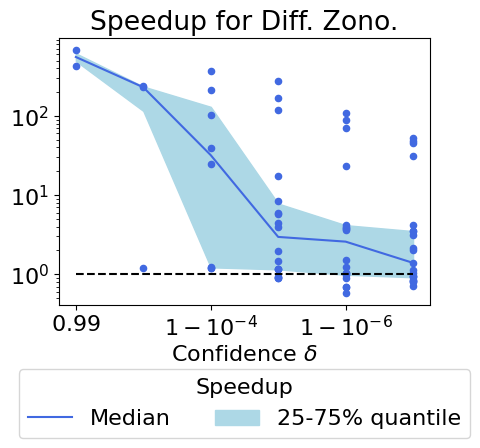

In [82]:
# Two plots with speedup and split reduction
fig, ax = plt.subplots(1,1, figsize=(5,5))

deltas = []

speedup_q25 = []
speedup_median = []
speedup_q75 = []

split_reduction_q25 = []
split_reduction_median = []
split_reduction_q75 = []

for x,y in zip(delta_plots.index,delta_plots.values):
    deltas.append(str(x[0]))
    speedup_q25.append(y[0])
    speedup_median.append(y[1])
    speedup_q75.append(y[2])
    split_reduction_q25.append(y[3])
    split_reduction_median.append(y[4])
    split_reduction_q75.append(y[5])

xs = np.array(deltas)#np.arange(len(deltas))
#xs = np.max(xs) - xs
ax.fill_between(xs, speedup_q25, speedup_q75, color="lightblue", label="Quantiles")
ax.plot(xs, speedup_median, label="Speedup", color="royalblue")
#ax.set_xticks([0,3,5])
#delta_text = deltas
#delta_text = ["$10^{-"+str(i+1)+"}$" for i in range(len(deltas))]
#print(delta_text)
#delta_text = ["$10^{-2}$","$10^{-4}$", "$10^{-6}$"]
#ax.set_xticklabels(delta_text)

scatter_plot_data = results_naive[results_naive["status"]=="safe"].copy()
scatter_plot_data["delta"]=scatter_plot_data["delta"].astype(str)
scatter_plot_data.plot(x="delta",y="speedup",kind="scatter",logy=True,ax=ax,color="royalblue")

ax.plot([0,5],[1,1],color="black",linestyle="--")
ax.set_title("Speedup for Diff. Zono.")
ax.set_yscale("log")

#[0.99,0.999,0.9999,0.99999,0.999999,0.9999999]

ax.set_xlabel("Confidence $\delta$")
ax.set_xticks([0,2,4])
ax.set_xticklabels(["$0.99$","$1-10^{-4}$","$1-10^{-6}$"])
ax.set_ylabel(None)

# Print legend below plot
handles, labels = ax.get_legend_handles_labels()
labels = ["Median", "25-75% quantile"]
handles = reversed(handles)

ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2,title="Speedup")

# ax[1].fill_between(xs, split_reduction_q25, split_reduction_q75, alpha=0.5)
# ax[1].plot(xs, split_reduction_median, label="Split reduction")
# ax[1].set_xlabel("Confidence Gap $(1-\delta)$")
# ax[1].set_ylabel("Split reduction")
# ax[1].set_xticks([0,3,5])
# ax[1].set_xticklabels(delta_text)
# ax[1].set_title("Split reduction")

plt.tight_layout()
plt.show()

In [83]:
fig.savefig("speedup_lhc_diffzono.eps",bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


### Speedup by Pruning

In [85]:
#table_1_1 = pd.concat([results_safe.copy(),results_safe_rice.copy()])
pruning_plots = results_safe[results_safe["solver"] != "abCROWN"].copy()
#table_1_1 = table_1_1.groupby(["mirror","solver"]).agg({"speedup": [helper.q25,"median",helper.q75], "split_reduction": [helper.q25,"median",helper.q75]})
pruning_plots = pruning_plots[pruning_plots["solver"]=="VeryDiff-Naive"].copy()

Text(0.5, 0.98, '')

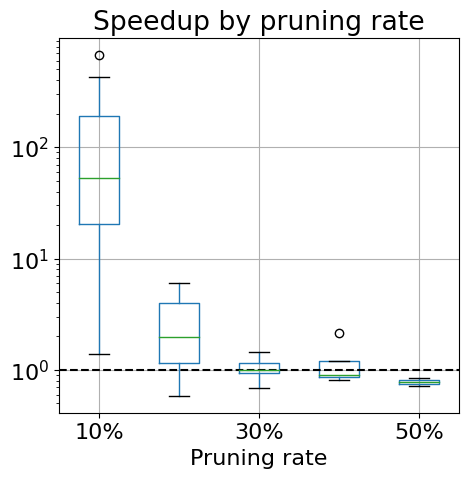

In [86]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
#pruning_plots["mirror"] = pruning_plots.index.get_level_values(0)
pruning_plots.boxplot(column="speedup",by="mirror",ax=ax)
#pruning_plots.plot(x="mirror",y=("speedup","median"),kind="bar", label="Speedup", color="royalblue", ax=ax)
ax.set_xticks([1,3,5])
ax.set_xticklabels(["10%", "30%", "50%"])
ax.plot([0.5,5.5],[1,1],color="black",linestyle="--")
ax.set_xlabel("Pruning rate")
ax.set_yscale("log")
ax.set_title("Speedup by pruning rate")
fig.suptitle("")

In [87]:
pruning_plots.groupby("mirror").agg({"speedup": [helper.q25,"median",helper.q75]})

speedup                       
                 q25     median         q75
mirror                                     
prune-0.1  20.334640  52.944282  189.016903
prune-0.2   1.149778   1.959259    3.960208
prune-0.3   0.930763   0.999418    1.165985
prune-0.4   0.870724   0.893350    1.202667
prune-0.5   0.748256   0.783094    0.817931

In [88]:
results_safe[results_safe["solver"] != "abCROWN"].groupby(["network","mirror"]).agg({"difference":"max", "speedup": ["min","count",helper.q25,"median",helper.q75,"max"]})

difference    speedup                               \
                           max        min count        q25      median   
network  mirror                                                          
2_20-0.1 prune-0.1   53.475550   1.392073     6   4.968674   23.836161   
         prune-0.2  166.395120   0.587570     5   0.929842    1.134435   
         prune-0.3  199.731598   0.815907     3   0.875795    0.935683   
         prune-0.4  203.467539   0.805793     1   0.805793    0.805793   
         prune-0.5  220.709512   0.713418     1   0.713418    0.713418   
2_20-1   prune-0.1   64.758355   3.469707     6   3.855386   14.504815   
         prune-0.2  158.236785   0.685978     4   0.789546    0.986923   
         prune-0.3  198.859806   0.692979     3   0.791437    0.889895   
         prune-0.4  211.540261   0.892367     3   0.893350    0.894333   
         prune-0.5  220.630883   0.852769     1   0.852769    0.852769   
2_40-0.1 prune-0.1  119.640978  52.944282     4  95.055969  191.252789   
         prune-0.2  295.995308   3.175288     3   3.567748    3.960208   
         prune-0.3  374.973600   0.916003     4   0.998983    1.100596   
2_40-1   prune-0.1  164.571380  48.435769     4  64.704423   86.935983   
         prune-0.2  290.662393   4.200138     3   4.219818    4.239498   
         prune-0.3  375.346567   0.952549     3   0.999134    1.045718   
2_80-0.1 prune-0.1  285.681705  17.498451     3  20.334640   23.170828   
         prune-0.2  629.917373   1.501120     3   1.730189    1.959259   
2_80-1   prune-0.1  165.512083  45.637735     4  78.493164  129.036308   
         prune-0.2  293.271151   3.509717     3   3.586604    3.663491   
         prune-0.3  373.840021   1.026010     3   1.126108    1.226205   
4_20-0.1 prune-0.2  220.772571        NaN     0        NaN         NaN   
         prune-0.3  268.690900        NaN     0        NaN         NaN   
4_20-1   prune-0.2  207.983925        NaN     0        NaN         NaN   

                                            
                           q75         max  
network  mirror                             
2_20-0.1 prune-0.1  189.795165  431.468784  
         prune-0.2    1.185806    1.207400  
         prune-0.3    0.954254    0.972825  
         prune-0.4    0.805793    0.805793  
         prune-0.5    0.713418    0.713418  
2_20-1   prune-0.1  178.574165  677.081927  
         prune-0.2    1.164610    1.209104  
         prune-0.3    0.920841    0.951787  
         prune-0.4    1.511001    2.127669  
         prune-0.5    0.852769    0.852769  
2_40-0.1 prune-0.1  296.103504  364.176875  
         prune-0.2    4.864477    5.768746  
         prune-0.3    1.188058    1.228585  
2_40-1   prune-0.1  107.063693  117.020800  
         prune-0.2    5.115149    5.990800  
         prune-0.3    1.104425    1.163131  
2_80-0.1 prune-0.1   27.235897   31.300965  
         prune-0.2    1.984122    2.008985  
2_80-1   prune-0.1  178.822273  209.406162  
         prune-0.2    3.814077    3.964663  
         prune-0.3    1.339157    1.452109  
4_20-0.1 prune-0.2         NaN         NaN  
         prune-0.3         NaN         NaN  
4_20-1   prune-0.2         NaN         NaN